# The Adult Income dataset

### Description

Title of dataset: adult.csv

Sources:

    * Original owners of database - US Census Bureau
    * Donor of database - Ronny Kohavi and Barry Becker
    * Date received - 05/19/96 
    
Number of Instances

    * 48842 instances, mix of continuous and discrete (train=32561, test=16281)
    * 45222 if instances with unknown values are removed (train=30162, test=15060)
    * Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

Number of Attributes/Fearures/Columns

    * 6 continuous, 8 nominal attributes. 

Attribute Information/Fearures/Columns

    * age: continuous.
    * workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    * fnlwgt: continuous.
    * education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    * education-num: continuous.
    * marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    * occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    * relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    * race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    * sex: Female, Male.
    * capital-gain: continuous.
    * capital-loss: continuous.
    * hours-per-week: continuous.
    * native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
    * income: >50K, <=50K 
    
Missing Values:
     
     7% rows have missing values. 
     


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
#knowing about the shape of the data
df.shape
print('no. of rows:',df.shape[0])
print('no. of columns:',df.shape[1])

no. of rows: 48842
no. of columns: 15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [3]:
#dealing with the missing values
miss=['?']
df_new=pd.read_csv('adult.csv', na_values=miss)
df_new.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df.loc[df.workclass=='?','native-country']

4        United-States
6        United-States
13       United-States
22       United-States
35       United-States
             ...      
48811    United-States
48812    United-States
48820    United-States
48822    United-States
48823    United-States
Name: native-country, Length: 2799, dtype: object

<b>observation</b>
It can be observed that mostly the missing values are from the workclass and occupation column.
It can also be observed that mostly the rows have native-country as 'united states'.

In [8]:
df_new.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

<b><h1>Observations</h1></b>
<p>It can be observed that the most of the missing values are from the workclass and occupation columns simultaneously.</p>

In [4]:
df_new.dropna(axis=0,how='any',inplace=True)
# Now we know that fnlwgt column is not useful to us so we will remove it
df_new.drop('fnlwgt',axis=1,inplace=True)
df_new.shape

(45222, 14)

In [13]:
#percentage of row having missing value
missing_values=(df.shape[0]-df_new.shape[0])/df.shape[0]
print(missing_values)

0.07411653904426518


<b>Observations</b>
<p>It can be observed that out of total 7.41% rows have one or more missing values.</p>

<p>Now the size of our data is 45222 rows and 14 columns.</p>

</b><h1>univariate analysis</h1></b>

In [14]:
df_new.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


<function matplotlib.pyplot.show(*args, **kw)>

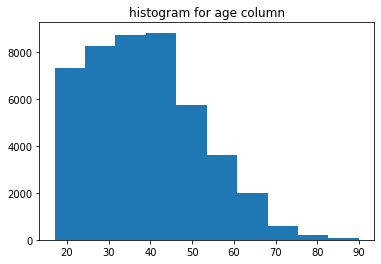

In [12]:
#Now performing univariate analysis on the age column
plt.hist(df_new['age'])
plt.title('histogram for age column')
plt.show

<b>Observation</b>
<p>It can be observed that most of the people in this dataset belong to the age group of 20-40.

<function matplotlib.pyplot.show(*args, **kw)>

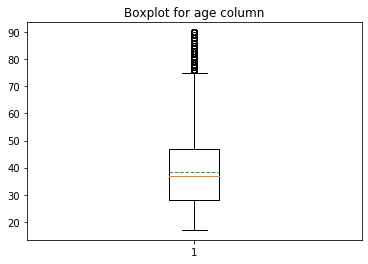

In [44]:
plt.boxplot(df_new['age'],showmeans=True,meanline=True)
plt.title('Boxplot for age column')
plt.show

It can be observed from the above boxplot that median of the age column is 37 and the mean of the age is 39.
Also its first and third quantile are 29 and 47 respectively. It also means that most of the data values lies within this range.
It can also be damaged that there are also presence of outliers in this column which can be easily determined by viewing to the plot.
In this case the outliers are people having age above 75.

Text(0.5, 1.0, 'PDF for age column')

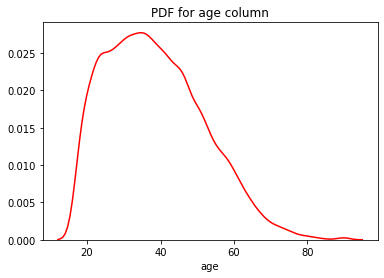

In [66]:
sns.distplot(df_new['age'],color='r',hist=False,kde=True,rug=False)
plt.title('PDF for age column')

It can be observed that this plot is not symmetric and is skewed right or positively skewed.
In this the mean is shifted toward left side.
From this curve this is also clear that the outliers are present on right hand side of the plot.

In [15]:
print(df_new.workclass.value_counts())
df_new.workclass.value_counts(normalize=True)

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64


Private             0.736522
Self-emp-not-inc    0.083941
Local-gov           0.068551
State-gov           0.043032
Self-emp-inc        0.036398
Federal-gov         0.031091
Without-pay         0.000464
Name: workclass, dtype: float64

It can be observed that most of the people are employed in the private sector.
This code shows the percentage of the all people employed in the different sectors.

<=50K    37155
>50K     11687
Name: income, dtype: int64
In the percentage:
 <=50K    0.760718
>50K     0.239282
Name: income, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

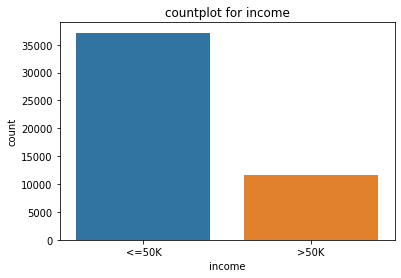

In [9]:
print(df_new['income'].value_counts())
print('In the percentage:\n',df_new['income'].value_counts(normalize=True))
sns.countplot(df['income'])
plt.title('countplot for income')
plt.show

It can be observed that 75.21% of people have there income less than or equal to 50K and rest(24.78%) have income greater than 50K.

Male      32650
Female    16192
Name: gender, dtype: int64
In the normalized form:
 Male      0.668482
Female    0.331518
Name: gender, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

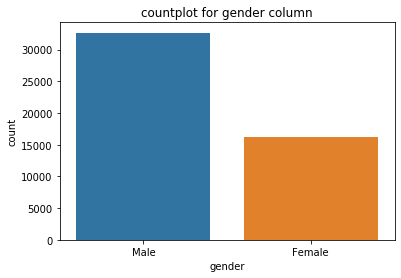

In [8]:
#analysis about the gender column
print(df_new.gender.value_counts())
print('In the normalized form:\n',df_new.gender.value_counts(1))
sns.countplot(df_new.gender)
plt.title('countplot for gender column')
plt.show

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64
In the normalized form:
 White                 0.855043
Black                 0.095922
Asian-Pac-Islander    0.031100
Amer-Indian-Eskimo    0.009623
Other                 0.008313
Name: race, dtype: float64


Text(0.5, 1.0, 'countplot for race column')

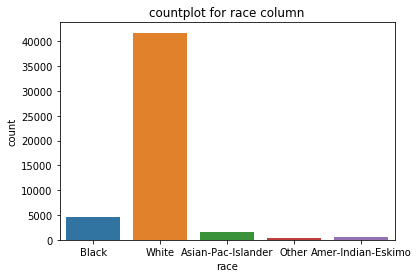

In [7]:
#analysis for race column
print(df_new.race.value_counts())
print('In the normalized form:\n',df_new.race.value_counts(1))
sns.countplot(df_new.race)
plt.title('countplot for race column')

Text(0.5, 1.0, 'PDF for race column')

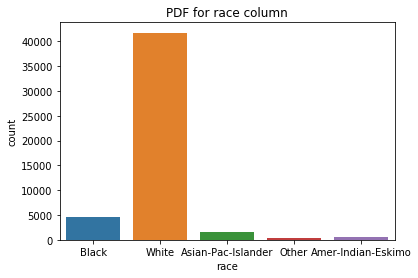

In [6]:
sns.countplot(df_new['race'])
plt.title('PDF for race column')

<b><h1>Bivariate Analysis</h1></b>

In [15]:
df_new.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [16]:
#bivariate analysis for marital-status with other columns crosstab function 
pd.crosstab(df_new['marital-status'],df_new['income'],normalize='columns')

income,<=50K,>50K
marital-status,,
Divorced,0.160463,0.057414
Married-AF-spouse,0.000619,0.001198
Married-civ-spouse,0.333602,0.854283
Married-spouse-absent,0.015341,0.004963
Never-married,0.414049,0.062719
Separated,0.038514,0.008471
Widowed,0.037411,0.010952


In [18]:
pd.crosstab(df_new.gender,df_new.income,normalize='columns')

income,<=50K,>50K
gender,,
Female,0.388185,0.151365
Male,0.611815,0.848635


It can be observed that in the category of income of 50k and less 38.81% are female and 61.18% are male. And in category of income above 50k there are 15.13% female and 84.86% male.

In [57]:
wrk=df.groupby('workclass')
rlt=df.groupby('relationship')
inc=df.groupby('income')

gender=df.groupby('gender')
gender['hours-per-week'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,16192.0,36.400692,11.948866,1.0,30.0,40.0,40.0,99.0
Male,32650.0,42.416845,12.120042,1.0,40.0,40.0,48.0,99.0


From above data it can be observed that female works 36.40 hours per week on an average which is less than the male who works for 42.41 hours per week.

In [13]:
mar=df_new.groupby('marital-status')
mar['hours-per-week'].describe()

,count,mean,std,min,25%,50%,75%,max
marital-status,,,,,,,,
Divorced,6297.0,41.382404,10.386367,1.0,40.0,40.0,45.0,99.0
Married-AF-spouse,32.0,42.562500,15.614174,10.0,39.5,40.0,45.5,90.0
Married-civ-spouse,21055.0,43.820565,11.525242,1.0,40.0,40.0,50.0,99.0
Married-spouse-absent,552.0,40.112319,11.942165,3.0,38.0,40.0,40.0,99.0
Never-married,14598.0,37.244143,12.185505,1.0,30.0,40.0,40.0,99.0
Separated,1411.0,39.972360,9.852383,2.0,38.0,40.0,40.0,99.0
Widowed,1277.0,34.829287,13.393162,1.0,25.0,40.0,40.0,99.0


It can be observed that married-civ-spouse works more than the other categories as they have an average of 43.30 hours per 9week(i.e, on average 7-8 hours per day).
It can also be observed that all the categories have same median i.e 40.
It can also be observed that never-married guys works less than the married ones.

In [9]:
print(pd.crosstab(df_new.race,df_new.income,normalize='columns'))
pd.crosstab(df_new.race,df_new.income)

income                 <=50K      >50K
race                                  
Amer-Indian-Eskimo  0.011169  0.004706
Asian-Pac-Islander  0.029875  0.034996
Black               0.110860  0.048430
Other               0.009581  0.004278
White               0.838514  0.907590


income,<=50K,>50K
race,,
Amer-Indian-Eskimo,415,55
Asian-Pac-Islander,1110,409
Black,4119,566
Other,356,50
White,31155,10607


It can be observed that in both the category of the income the white people have highest number of people(i.e, 83.85% in <=50k category and 90.75% in >50k category.)

In [8]:
pd.crosstab(df_new['marital-status'],df_new.relationship)

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
marital-status,,,,,,
Divorced,0,3628,181,455,2369,0
Married-AF-spouse,12,0,1,1,0,23
Married-civ-spouse,19704,23,201,143,0,2308
Married-spouse-absent,0,330,54,61,183,0
Never-married,0,7114,920,6750,1333,0
Separated,0,637,79,146,668,0
Widowed,0,851,70,25,572,0


Nothing can be observed from this data.

In [16]:
df_new.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


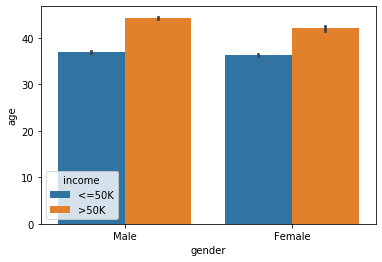

In [22]:
ax=sns.barplot(x='gender',y='age',hue='income',data=df_new)

It can be observed that the average age of the male in the income category of less than or equal to 50k is 37 and that in the category of above 50k is 45.
It can be observed that the average age of the female in the income category of less than or equal to 50k is 35 and that in the category of above 50k is 42.

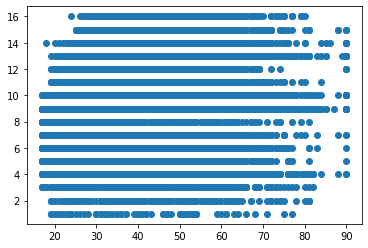

In [32]:
plt.scatter(df_new.age,df_new['educational-num'])

No observation can be done.

<function matplotlib.pyplot.show(*args, **kw)>

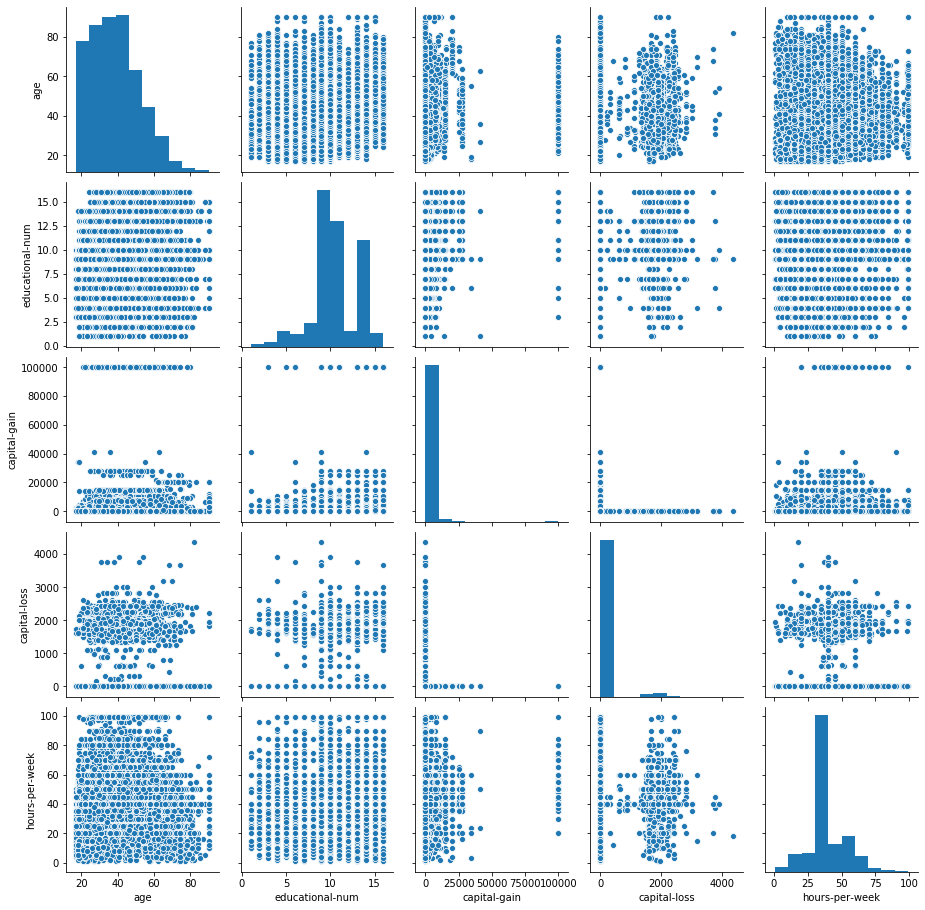

In [5]:
sns.pairplot(df_new)
plt.show

Not any of the plot is giving any useful observation. So no two simultaneous numeric column is giving any useful information.

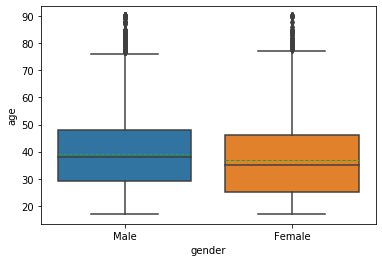

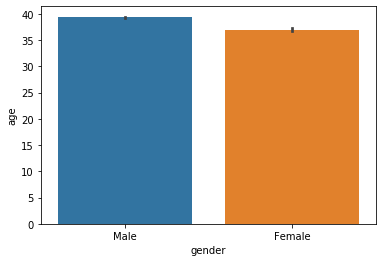

In [40]:
#bivariate analysis of numeric column with categorical column
sns.boxplot(x='gender',y='age',data=df_new,showmeans=True,meanline=True)
plt.show()

sns.barplot(x='gender',y='age',data=df_new)
plt.show()

It can be observed that male have mean age as 40 and median age as 39. And the first quartile(25%) is 29 and third quartile(75%) is 49. Also male having age above 77 are considered as outliers.
It can be observed that female have mean age as 37 and median age as 35. And the first quartile(25%) is 26 and third quartile(75%) is 46. Also female having age above 78 are considered as outliers.

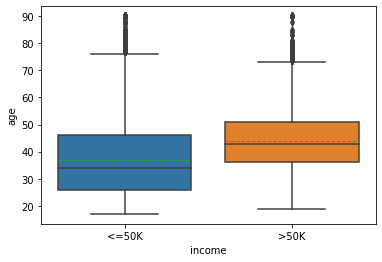

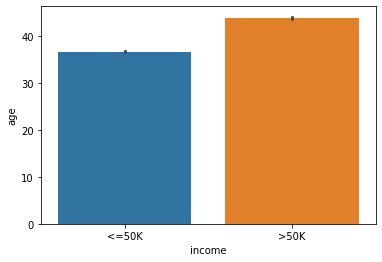

In [38]:
sns.boxplot(x='income',y='age',data=df_new,showmeans=True,meanline=True)
plt.show()

sns.barplot(x='income',y='age',data=df_new)
plt.show()

<p>It can be observed that 50% of the people in the category of less than or equal to 50k have age less than 33 and most of the people of the same category are in the range of 27(25%)-47(75%). And the people having age above 77 are considered as oultiers.</p><p> While in the income category of >50k maximum of the people are in the range of the 36(25%)-52(75%) and 50% of the people have age less than 43. And the people having age above 72 are considered as outliers.

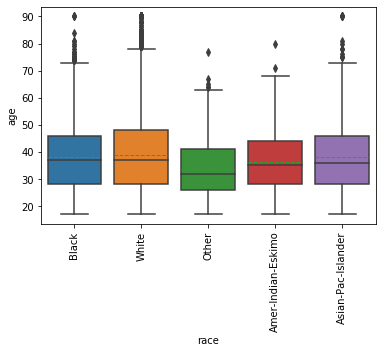

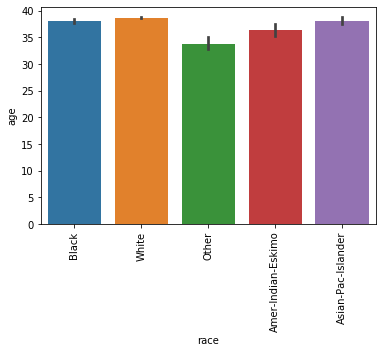

In [35]:
sns.boxplot(x='race',y='age',data=df_new,showmeans=True,meanline=True)
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='race',y='age',data=df_new)
plt.xticks(rotation=90)
plt.show()

From the above data we can observed the mean age of the different categories in the race column.
We can also observe the outliers in each category.

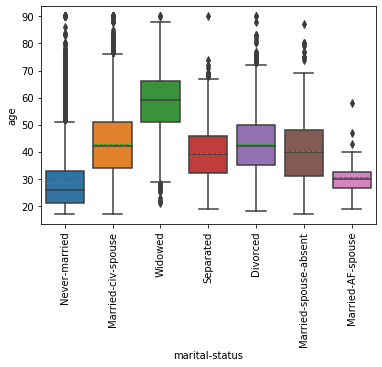

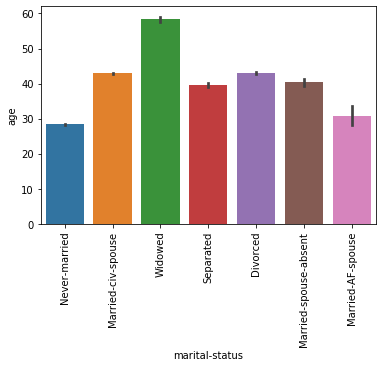

****************************** age ******************************
Mean
never-married: 28.461501575558295
married-civ-spouse: 42.889337449536924
Widowed: 58.38371182458888
Seperated: 39.6343019135365
Divorced: 43.02159758615213
Married-spouse-absent: 40.447463768115945
Married-AF-spouse: 30.78125

Median:
never-married: 26.0
married-civ-spouse: 42.0
Widowed: 59.0
Seperated: 39.0
Divorced: 42.0
Married-spouse-absent: 40.0
Married-AF-spouse: 30.0


In [33]:
sns.boxplot(x='marital-status',y='age',data=df_new,showmeans=True,meanline=True)
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='marital-status',y='age',data=df_new)
plt.xticks(rotation=90)
plt.show()

print('*'*30,'age','*'*30)
print('Mean')
print('never-married:',np.mean(mar.get_group('Never-married').age))
print('married-civ-spouse:',np.mean(mar.get_group('Married-civ-spouse').age))
print('Widowed:',np.mean(mar.get_group('Widowed').age))
print('Seperated:',np.mean(mar.get_group('Separated').age))
print('Divorced:',np.mean(mar.get_group('Divorced').age))
print('Married-spouse-absent:',np.mean(mar.get_group('Married-spouse-absent').age))
print('Married-AF-spouse:',np.mean(mar.get_group('Married-AF-spouse').age))

print('')
print('Median:')
print('never-married:',np.median(mar.get_group('Never-married').age))
print('married-civ-spouse:',np.median(mar.get_group('Married-civ-spouse').age))
print('Widowed:',np.median(mar.get_group('Widowed').age))
print('Seperated:',np.median(mar.get_group('Separated').age))
print('Divorced:',np.median(mar.get_group('Divorced').age))
print('Married-spouse-absent:',np.median(mar.get_group('Married-spouse-absent').age))
print('Married-AF-spouse:',np.median(mar.get_group('Married-AF-spouse').age))

From the above data we can observe the mean and median age of the different categories of the marital-status.
The differnece between mean and median can be viewed as the presence of oultier in that category.
It can be observed that widowed is the only category which have outliers on both side,i.e, some of widow are of very young and some of them are very old age.

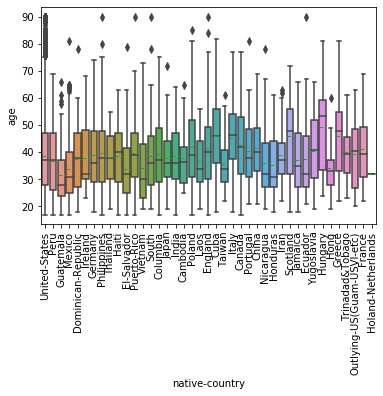

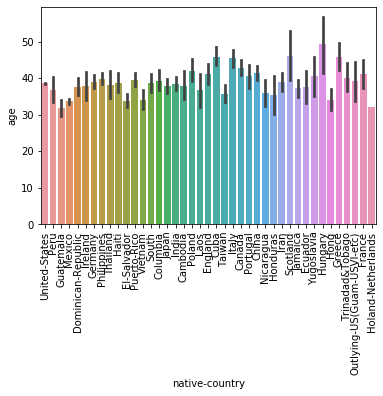

In [41]:
sns.boxplot(x='native-country',y='age',data=df_new,showmeans=True,meanline=True)
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='native-country',y='age',data=df_new)
plt.xticks(rotation=90)
plt.show()

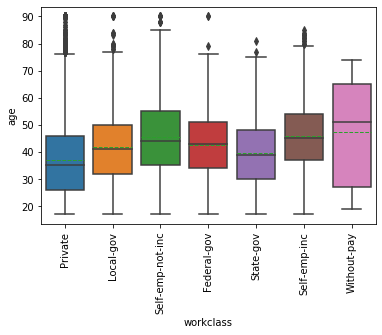

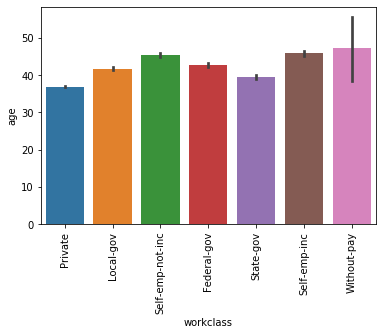

****************************** age ******************************
Mean
Private: 36.90314398631511
Local-gov: 41.67602040816327
Self-emp-not-inc: 45.332470222682545
Federal-gov: 42.577513966480446
State-gov: 39.512367491166074
Self-emp-inc: 45.799410029498524
Without-pay: 47.285714285714285

Median:
Private: 35.0
Local-gov: 41.0
Self-emp-not-inc: 44.0
Federal-gov: 43.0
State-gov: 39.0
Self-emp-inc: 45.0
Without-pay: 51.0


In [43]:
sns.boxplot(x='workclass',y='age',data=df_new,showmeans=True,meanline=True)
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='workclass',y='age',data=df_new)
plt.xticks(rotation=90)
plt.show()

print('*'*30,'age','*'*30)

print('Mean')
print('Private:',np.mean(wrk.get_group('Private').age))
print('Local-gov:',np.mean(wrk.get_group('Local-gov').age))
print('Self-emp-not-inc:',np.mean(wrk.get_group('Self-emp-not-inc').age))
print('Federal-gov:',np.mean(wrk.get_group('Federal-gov').age))
print('State-gov:',np.mean(wrk.get_group('State-gov').age))
print('Self-emp-inc:',np.mean(wrk.get_group('Self-emp-inc').age))
print('Without-pay:',np.mean(wrk.get_group('Without-pay').age))

print('')
print('Median:')
print('Private:',np.median(wrk.get_group('Private').age))
print('Local-gov:',np.median(wrk.get_group('Local-gov').age))
print('Self-emp-not-inc:',np.median(wrk.get_group('Self-emp-not-inc').age))
print('Federal-gov:',np.median(wrk.get_group('Federal-gov').age))
print('State-gov:',np.median(wrk.get_group('State-gov').age))
print('Self-emp-inc:',np.median(wrk.get_group('Self-emp-inc').age))
print('Without-pay:',np.median(wrk.get_group('Without-pay').age))

From the bar plot we can observe the average age of employees working in each of the category of the workclass.(eg: Mean age in private is 38.)


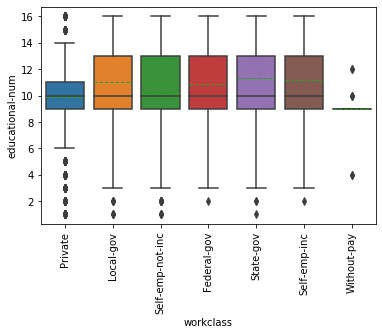

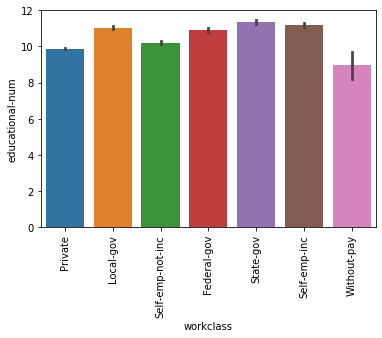

****************************** Educational-num ******************************
Mean
Private: 9.87571521264673
Local-gov: 11.032206632653061
Self-emp-not-inc: 10.227343345416882
Federal-gov: 10.937150837988828
State-gov: 11.387178192831904
Self-emp-inc: 11.159882005899705
Without-pay: 8.952380952380953


In [46]:
#Bivariate analysis for educational-num
sns.boxplot(x='workclass',y='educational-num',data=df_new,showmeans=True,meanline=True)
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='workclass',y='educational-num',data=df_new)
plt.xticks(rotation=90)
plt.show()

print('*'*30,'Educational-num','*'*30)

print('Mean')
print('Private:',np.mean(wrk.get_group('Private')['educational-num']))
print('Local-gov:',np.mean(wrk.get_group('Local-gov')['educational-num']))
print('Self-emp-not-inc:',np.mean(wrk.get_group('Self-emp-not-inc')['educational-num']))
print('Federal-gov:',np.mean(wrk.get_group('Federal-gov')['educational-num']))
print('State-gov:',np.mean(wrk.get_group('State-gov')['educational-num']))
print('Self-emp-inc:',np.mean(wrk.get_group('Self-emp-inc')['educational-num']))
print('Without-pay:',np.mean(wrk.get_group('Without-pay')['educational-num']))

It can be observed from the box-plot that in the category of without-pay there are only three data values and they all works as outliers to the plot. Its median is 9.5.
From the bar plot we can get the average mean of the educational-num that one have in the different categories of the workclass.


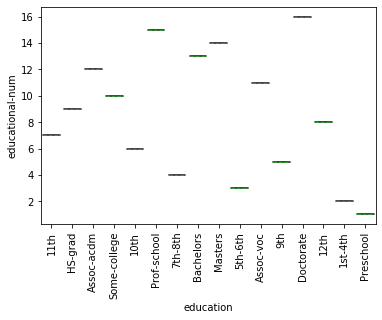

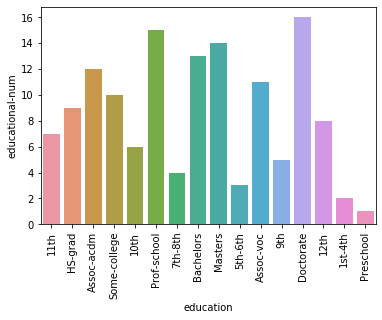

In [47]:
sns.boxplot(x='education',y='educational-num',data=df_new,showmeans=True,meanline=True)
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='education',y='educational-num',data=df_new)
plt.xticks(rotation=90)
plt.show()

In this case it can be observed that the boxplot act same as the scatter plot which shows the value of educational num corresponding to the educational qualification.

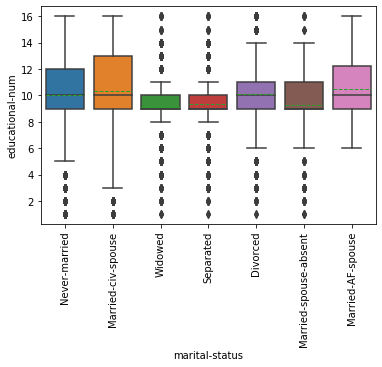

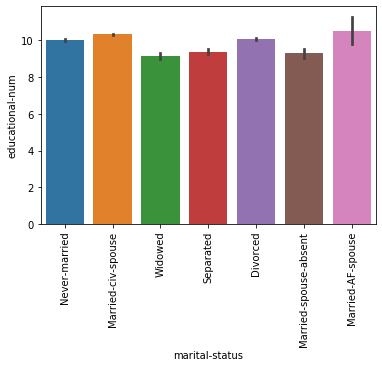

In [50]:
sns.boxplot(x='marital-status',y='educational-num',data=df_new,showmeans=True,meanline=True)
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='marital-status',y='educational-num',data=df_new)
plt.xticks(rotation=90)
plt.show()

From the above data it can be observed that there is very diversed distribution of educational number among the different categories of the marital-status except 'Married-AF-spouse'.
Bar plot gives us mean of the education num distributed among the different categories in the marital-status.

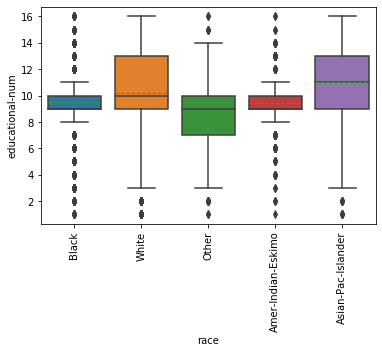

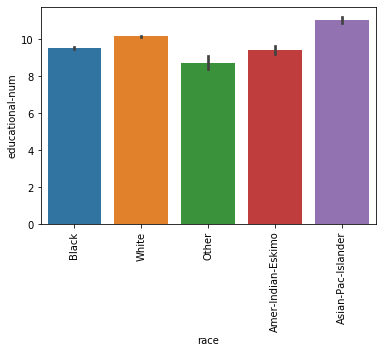

In [51]:
sns.boxplot(x='race',y='educational-num',data=df_new,showmeans=True,meanline=True)
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='race',y='educational-num',data=df_new)
plt.xticks(rotation=90)
plt.show()

<p>From the boxplot it can be observed that white people are more educated and less diversified as compared to other and they have 10 as their median educational-num.
<p>From the bar-plot it is clear that on an average asian-pac-islander people have educational-num and are more educated.

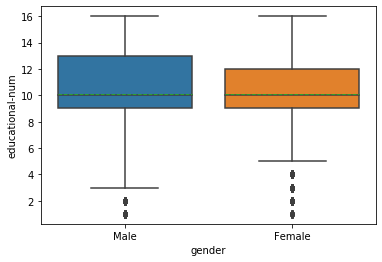

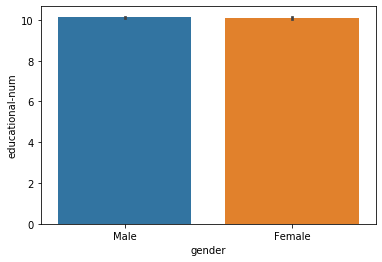

****************************** Educational-num ******************************
Mean
Male: 10.094977029096478
Female: 10.044034090909092


In [54]:
sns.boxplot(x='gender',y='educational-num',data=df_new,showmeans=True,meanline=True)
plt.show()

sns.barplot(x='gender',y='educational-num',data=df_new)
plt.show()

print('*'*30,'Educational-num','*'*30)

print('Mean')
print('Male:',np.mean(gender.get_group('Male')['educational-num']))
print('Female:',np.mean(gender.get_group('Female')['educational-num']))


It can be observed that mean of both the male and female are same in case of educational-num,i.e, both are well educated.

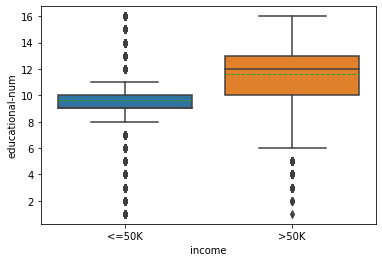

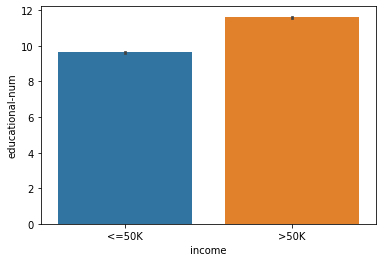

****************************** Educational-num ******************************
Mean
<=50k: 9.598492800430629
>50k: 11.602806537178061


In [59]:
sns.boxplot(x='income',y='educational-num',data=df_new,showmeans=True,meanline=True)
plt.show()

sns.barplot(x='income',y='educational-num',data=df_new)
plt.show()

print('*'*30,'Educational-num','*'*30)

print('Mean')
print('<=50k:',np.mean(inc.get_group('<=50K')['educational-num']))
print('>50k:',np.mean(inc.get_group('>50K')['educational-num']))

<p>From the boxplot it is clear that the people in the category of >50k have higher educational-num as compared to <=50k.
<p>From the barplot it is clear that people in the category of >50k have higher mean educational-num than the <=50K.
<p>That clearly signifies that knowledge never fails.

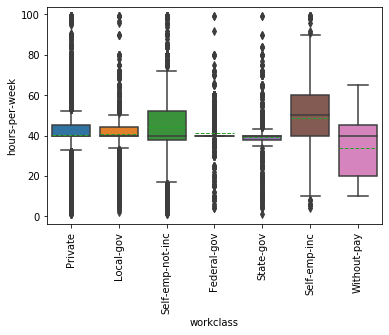

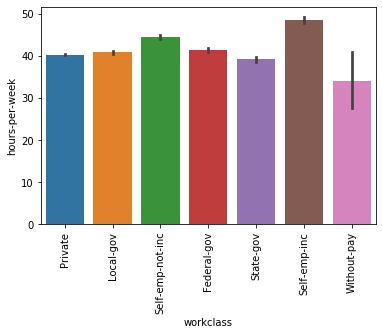

In [61]:
sns.boxplot(x='workclass',y='hours-per-week',data=df_new,showmeans=True,meanline=True)
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='workclass',y='hours-per-week',data=df_new)
plt.xticks(rotation=90)
plt.show()

<p>From the boxplot the federal gov shows that hours-per-week is very diversified and there is no IQR range for it.
<p>From the barplot it is clear that almost all the departments works on an average about 40 hours-per-week except without-pay category.

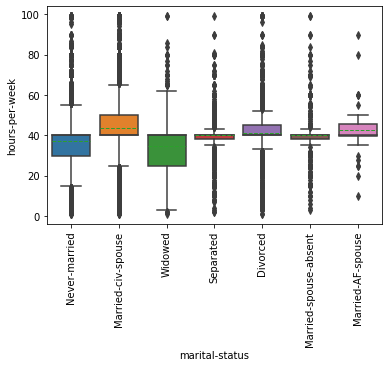

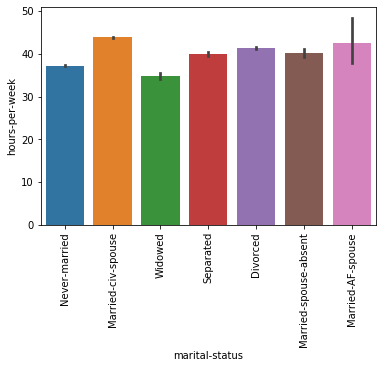

****************************** hours-per-week ******************************
Mean
never-married: 37.24414303329223
married-civ-spouse: 43.82056518641653
Widowed: 34.82928739232576
Seperated: 39.97236002834869
Divorced: 41.38240431951723
Married-spouse-absent: 40.11231884057971
Married-AF-spouse: 42.5625

Median:
never-married: 40.0
married-civ-spouse: 40.0
Widowed: 40.0
Seperated: 40.0
Divorced: 40.0
Married-spouse-absent: 40.0
Married-AF-spouse: 40.0


In [64]:
sns.boxplot(x='marital-status',y='hours-per-week',data=df_new,showmeans=True,meanline=True)
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='marital-status',y='hours-per-week',data=df_new)
plt.xticks(rotation=90)
plt.show()

print('*'*30,'hours-per-week','*'*30)
print('Mean')
print('never-married:',np.mean(mar.get_group('Never-married')['hours-per-week']))
print('married-civ-spouse:',np.mean(mar.get_group('Married-civ-spouse')['hours-per-week']))
print('Widowed:',np.mean(mar.get_group('Widowed')['hours-per-week']))
print('Seperated:',np.mean(mar.get_group('Separated')['hours-per-week']))
print('Divorced:',np.mean(mar.get_group('Divorced')['hours-per-week']))
print('Married-spouse-absent:',np.mean(mar.get_group('Married-spouse-absent')['hours-per-week']))
print('Married-AF-spouse:',np.mean(mar.get_group('Married-AF-spouse')['hours-per-week']))

print('')
print('Median:')
print('never-married:',np.median(mar.get_group('Never-married')['hours-per-week']))
print('married-civ-spouse:',np.median(mar.get_group('Married-civ-spouse')['hours-per-week']))
print('Widowed:',np.median(mar.get_group('Widowed')['hours-per-week']))
print('Seperated:',np.median(mar.get_group('Separated')['hours-per-week']))
print('Divorced:',np.median(mar.get_group('Divorced')['hours-per-week']))
print('Married-spouse-absent:',np.median(mar.get_group('Married-spouse-absent')['hours-per-week']))
print('Married-AF-spouse:',np.median(mar.get_group('Married-AF-spouse')['hours-per-week']))

<p>From the boxplot it can be observed that most consistency in the hours-per-week is in case of widowed as compared to the others.
<p>From the barplot it is clear that married one's(married-civ-spouse as well as married-AF-spouse) works more than the others in the categories.

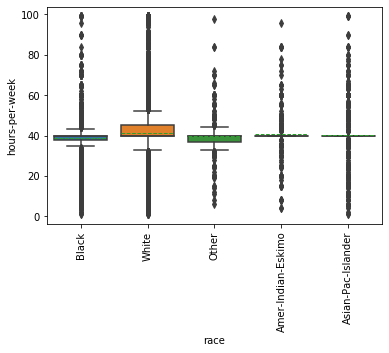

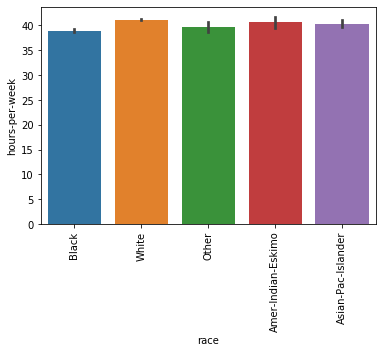

In [65]:
sns.boxplot(x='race',y='hours-per-week',data=df_new,showmeans=True,meanline=True)
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='race',y='hours-per-week',data=df_new)
plt.xticks(rotation=90)
plt.show()

From the boxplot it is clear that amer-indian-eskimo and asian-pac-islander have a diversified distributed hours-per-week.
From the barplot it is clear that all the categories are working for the same no. of hours-per-week on an average.

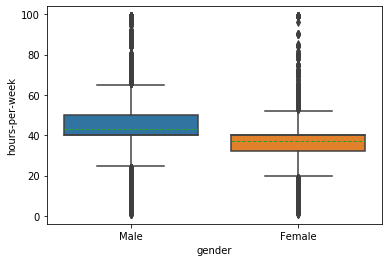

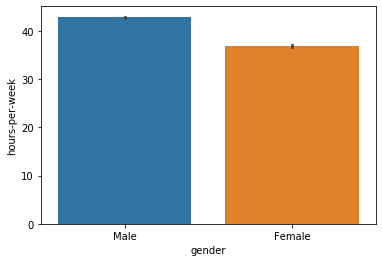

Mean
Male: 42.41684532924962
Female: 36.40069169960474


In [69]:
sns.boxplot(x='gender',y='hours-per-week',data=df_new,showmeans=True,meanline=True)
plt.show()

sns.barplot(x='gender',y='hours-per-week',data=df_new)
plt.show()

print('Mean')
print('Male:',np.mean(gender.get_group('Male')['hours-per-week']))
print('Female:',np.mean(gender.get_group('Female')['hours-per-week']))

<p>From the boxplot IQR of male is higher than IQR of female.This signifies that male works more than female.
<p>From the barplot it is clear that mean of hour-per-week of male is more than that of female.

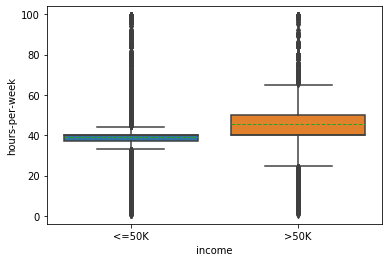

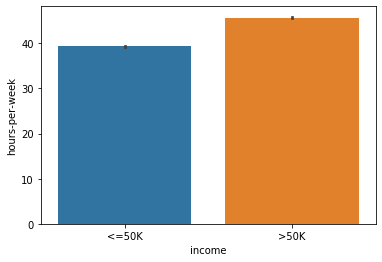

Mean
<=50k: 38.84004844570045
>50k: 45.45289638059382


In [70]:
sns.boxplot(x='income',y='hours-per-week',data=df_new,showmeans=True,meanline=True)
plt.show()

sns.barplot(x='income',y='hours-per-week',data=df_new)
plt.show()

print('Mean')
print('<=50k:',np.mean(inc.get_group('<=50K')['hours-per-week']))
print('>50k:',np.mean(inc.get_group('>50K')['hours-per-week']))


<p>From the boxplot it is clear that IQR(inter quartile range) of <=50k category is lower and less than the IQR of >50k category.
<p>This signifies that the people who works for more no. of hours are paid more than the others. So we should also always give our best at any work.

<b><h1>Conlusion</h1></b>

In [5]:
df1=df_new

In [9]:
#step-7 transforming categorical column to numeric value
catvar=['gender','income','marital-status','occupation','native-country','relationship','education','workclass','race']
data=pd.get_dummies(df_new,columns=catvar)

In [10]:
data.head(2)

,age,educational-num,capital-gain,capital-loss,hours-per-week,gender_Female,gender_Male,income_<=50K,income_>50K,marital-status_Divorced,...,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,25,7,0,0,40,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1


<b>Normalizing numeric column</b>

In [19]:
df_new.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [22]:
x_data=data[['age','educational-num','capital-gain',
       'capital-loss', 'hours-per-week']]

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scalar=MinMaxScaler()
scalar.fit(x_data)
data_new=scalar.transform(x_data)

In [25]:
data_new

array([[0.10958904, 0.4       , 0.        , 0.        , 0.39795918],
       [0.28767123, 0.53333333, 0.        , 0.        , 0.5       ],
       [0.15068493, 0.73333333, 0.        , 0.        , 0.39795918],
       ...,
       [0.56164384, 0.53333333, 0.        , 0.        , 0.39795918],
       [0.06849315, 0.53333333, 0.        , 0.        , 0.19387755],
       [0.47945205, 0.53333333, 0.1502415 , 0.        , 0.39795918]])